# Comparative Analysis
In this notebook, we compare ClaSS with competitors.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../../")

from tqdm import tqdm

In [3]:
from src.visualizer import plot_profile, plot_profile_with_ts

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [5]:
competitors = ["ADWIN", "HDDM", "BOCD", "NEWMA", "ChangeFinder", "DDM", "Window", "FLOSS", "ClaSS"]
dataset = "UTSA"
methods = list()

for candidate_name in competitors:
    methods.append((candidate_name, f"{candidate_name}.csv.gz"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../experiments/competitor_{dataset}/{file_name}", usecols=["dataset", eval_score], compression="gzip")
    
df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]
    
df_scores

,dataset,ADWIN,HDDM,BOCD,NEWMA,ChangeFinder,DDM,Window,FLOSS,ClaSS
0,Cane,0.312,0.630,0.503,0.507,0.507,0.858,0.507,0.637,0.831
1,DutchFactory,0.281,0.005,0.626,0.626,0.626,0.626,0.033,0.973,0.998
2,EEGRat,0.616,0.500,0.851,0.500,0.500,0.582,0.616,0.500,0.885
3,EEGRat2,0.500,0.500,0.516,0.500,0.500,0.646,0.856,0.500,0.739
4,Fetal2013,0.183,0.006,0.333,0.333,0.333,0.395,0.064,0.553,0.781
5,GrandMalSeizures,0.495,0.007,0.506,0.506,0.506,0.439,0.007,0.587,0.542
6,GrandMalSeizures2,0.508,0.008,0.508,0.508,0.508,0.666,0.013,0.508,0.761
7,GreatBarbet1,0.438,0.674,0.592,0.355,0.355,0.641,0.355,0.531,0.877
8,GreatBarbet2,0.469,0.696,0.729,0.355,0.355,0.991,0.355,0.792,0.817
9,InsectEPG1,0.439,0.653,0.657,0.653,0.653,0.653,0.653,0.255,0.751


Let's calculate the mean/median/std score.

In [6]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3729/2219294936.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_scores.mean(axis=0).round(3)


ADWIN           0.366
HDDM            0.331
BOCD            0.522
NEWMA           0.512
ChangeFinder    0.562
DDM             0.563
Window          0.405
FLOSS           0.606
ClaSS           0.824
dtype: float64

In [7]:
df_scores.median(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3729/1729043111.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_scores.median(axis=0).round(3)


ADWIN           0.410
HDDM            0.305
BOCD            0.512
NEWMA           0.510
ChangeFinder    0.531
DDM             0.535
Window          0.500
FLOSS           0.545
ClaSS           0.847
dtype: float64

In [8]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3729/1084607075.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_scores.std(axis=0).round(3)


ADWIN           0.192
HDDM            0.319
BOCD            0.137
NEWMA           0.105
ChangeFinder    0.179
DDM             0.140
Window          0.289
FLOSS           0.205
ClaSS           0.181
dtype: float64

Let's compute the wins per method.

In [9]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3729/3065857076.py:1: FutureWarning: Dropping of nuisance columns in DataFrame.rank is deprecated; in a future version this will raise TypeError. Select only valid columns before calling rank.
  ranks = df_scores.rank(1, method = 'min', ascending=False)


In [10]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

ADWIN:wins=0 rank=6.40625
HDDM:wins=0 rank=6.3125
BOCD:wins=1 rank=4.09375
NEWMA:wins=2 rank=3.875
ChangeFinder:wins=4 rank=3.875
DDM:wins=4 rank=4.1875
Window:wins=2 rank=5.21875
FLOSS:wins=5 rank=3.5625
ClaSS:wins=20 rank=1.65625


Let's plot and output the ranks.

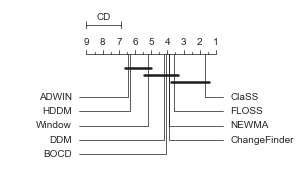

In [11]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=4, textspace=1.1, filename=f"../../figures/cd_comparative_{dataset}.pdf") # 

Let's compute wins/losses against ClaSP.

In [12]:
selection = "ClaSS"

for rival in df_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ClaSS vs ADWIN: (wins/ties/losses): 32/0/0
ClaSS vs HDDM: (wins/ties/losses): 32/0/0
ClaSS vs BOCD: (wins/ties/losses): 30/0/2
ClaSS vs NEWMA: (wins/ties/losses): 29/0/3
ClaSS vs ChangeFinder: (wins/ties/losses): 28/0/4
ClaSS vs DDM: (wins/ties/losses): 27/0/5
ClaSS vs Window: (wins/ties/losses): 30/0/2
ClaSS vs FLOSS: (wins/ties/losses): 27/0/5


/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3729/638649102.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3729/638649102.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


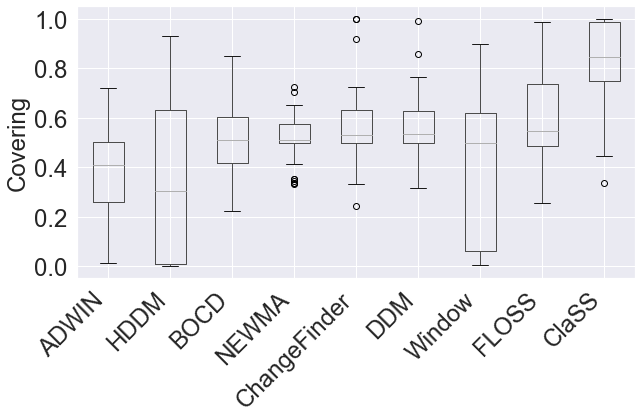

In [13]:
fontsize = 24
_, ax = plt.subplots(figsize=(10,5))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
ax.set_xticklabels(df_scores.columns[1:], rotation=45, ha="right")
ax.set_yticks(np.round(np.arange(0, 1.0+.2,.2),1))
    
plt.savefig(f"../../figures/bp_comparative_{dataset}.pdf", bbox_inches="tight") 